## Step 0: Importing Libraries

In [96]:
import glob
import numpy as np
import pandas as pd
import cv2 as cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

## Step 1: Loading Data

In [4]:
#reading path of images using glob

files_images = glob.glob('./data/*/*.jpg')    

In [5]:
#printing the length of total files and top 5 files

len(files_images) , files_images[0:5] 

(13233,
 ['./data/Marlon_Devonish/Marlon_Devonish_0001.jpg',
  './data/Dolly_Parton/Dolly_Parton_0002.jpg',
  './data/Dolly_Parton/Dolly_Parton_0001.jpg',
  './data/Rocco_Buttiglione/Rocco_Buttiglione_0001.jpg',
  './data/Brandon_Lloyd/Brandon_Lloyd_0001.jpg'])

### Generating Raw Labels and Features

In [6]:
raw_X = []
raw_y = []
for my_image in files_images:
    split_arr = my_image.split('/')
    raw_y.append(split_arr[-2])
    raw_X.append(my_image)

In [7]:
raw_X[0:5] , raw_y[0:5] , len(raw_X) , len(raw_y)

(['./data/Marlon_Devonish/Marlon_Devonish_0001.jpg',
  './data/Dolly_Parton/Dolly_Parton_0002.jpg',
  './data/Dolly_Parton/Dolly_Parton_0001.jpg',
  './data/Rocco_Buttiglione/Rocco_Buttiglione_0001.jpg',
  './data/Brandon_Lloyd/Brandon_Lloyd_0001.jpg'],
 ['Marlon_Devonish',
  'Dolly_Parton',
  'Dolly_Parton',
  'Rocco_Buttiglione',
  'Brandon_Lloyd'],
 13233,
 13233)

## Step 2: Preprocessing Data

### Creating Dataframe  to operate in pandas

In [8]:
df = pd.concat([pd.DataFrame(raw_X) , pd.DataFrame(raw_y)], axis=1) 
df.columns = ['Image','Label']

In [9]:
df.head()

,Image,Label
0,./data/Marlon_Devonish/Marlon_Devonish_0001.jpg,Marlon_Devonish
1,./data/Dolly_Parton/Dolly_Parton_0002.jpg,Dolly_Parton
2,./data/Dolly_Parton/Dolly_Parton_0001.jpg,Dolly_Parton
3,./data/Rocco_Buttiglione/Rocco_Buttiglione_000...,Rocco_Buttiglione
4,./data/Brandon_Lloyd/Brandon_Lloyd_0001.jpg,Brandon_Lloyd


### Getting Count of Images Category wise

In [10]:
df_count = df.groupby('Label').count()
df_count.columns = ['ImageCount']

In [11]:
df_count.sort_values('ImageCount' , ascending=False)

,ImageCount
Label,
George_W_Bush,530
Colin_Powell,236
Tony_Blair,144
Donald_Rumsfeld,121
Gerhard_Schroeder,109
Ariel_Sharon,77
Hugo_Chavez,71
Junichiro_Koizumi,60
Jean_Chretien,55


### Filtering Images having count >= 50

In [12]:
df_filter = df_count[ (df_count['ImageCount']) >= 50 ]

In [13]:
df_filter.index

Index(['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
       'Gerhard_Schroeder', 'Hugo_Chavez', 'Jacques_Chirac', 'Jean_Chretien',
       'John_Ashcroft', 'Junichiro_Koizumi', 'Serena_Williams', 'Tony_Blair'],
      dtype='object', name='Label')

In [14]:
list_index = df_filter.index.tolist()

In [21]:
final_df = df.loc[df['Label'].isin(list_index)]

In [91]:
final_df.shape , final_df.head()

((1560, 2),                                            Image          Label
 489  ./data/George_W_Bush/George_W_Bush_0394.jpg  George_W_Bush
 490  ./data/George_W_Bush/George_W_Bush_0377.jpg  George_W_Bush
 491  ./data/George_W_Bush/George_W_Bush_0204.jpg  George_W_Bush
 492  ./data/George_W_Bush/George_W_Bush_0203.jpg  George_W_Bush
 493  ./data/George_W_Bush/George_W_Bush_0416.jpg  George_W_Bush)

## Step 3: Image Augmentation

### Resizing and Cropping Image

In [27]:
X = []
y = []
X_dict = {}
for index, row in final_df.iterrows():
    #print(i)
    local_image =cv2.cvtColor( cv2.imread(row[0]) , cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(local_image, (96, 96))
    resized_image = resized_image[15:81,15:81]
    if row[1] not in X_dict:
        X_dict[row[1]] = [resized_image]
    else:
        X_dict[row[1]].append(resized_image)
    X.append( resized_image)
    y.append(row[1])

### Plotting Imbalanced Data

In [28]:
import seaborn as sns


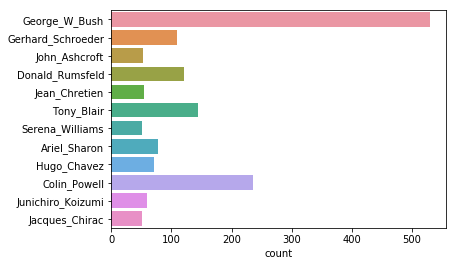

In [29]:
sns.countplot(y = y)

### Defining Augmentation Operation

In [30]:
from skimage import transform

In [31]:
def imgAug(img):
    result  = 255 *  transform.rotate(img, angle=np.random.uniform(-30,30), mode='edge')
    result = result.astype(np.uint8)
    return result

In [32]:
median = 400
X_updated = {}
X_augmented = []
y_augmented = []
for key, value in X_dict.items():
    if len(value) < 400:
        temp_values  = []
        for every_value in value:
            temp_values.append(every_value)
        i=0
        while(len(temp_values) != 400):
            if(i< len(value)):
                temp_image = imgAug(value[i])
                temp_values.append(temp_image)
                i=i+1
            else:
                i=0
        for every_value in temp_values:
            X_augmented.append(every_value)
            
        for j in range(len(temp_values)):
            y_augmented.append(key)
    else:
        temp_values = value[:400]
        for every_value in temp_values:
            X_augmented.append(every_value)
        for j in range(len(temp_values)):
            y_augmented.append(key)

In [33]:
np.array(X_augmented).shape

(4800, 66, 66, 3)

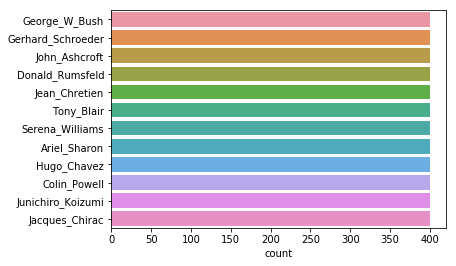

In [34]:
sns.countplot(y=y_augmented)

### Converting to numpy arrays

In [35]:
X = np.array(X_augmented)
y = np.array(y_augmented)

### Plotting Random Images

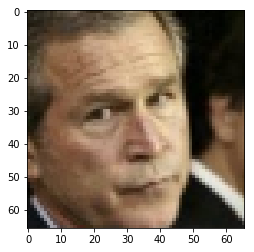

In [92]:
plt.imshow(X[0])

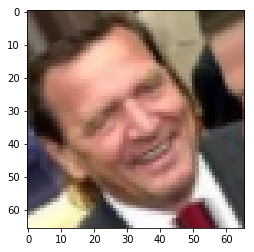

In [93]:
plt.imshow(X[789])

## Step 4: Data Preparation

### One Hot Encoding Labels

In [42]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
lblEncoder = LabelEncoder()
y = lblEncoder.fit_transform(y)
print(y.shape)
y = y.reshape(len(y), 1)
print(y.shape)
onehot = OneHotEncoder(sparse=False)
y = onehot.fit_transform(y)
print(y.shape)

(4800,)
(4800, 1)
(4800, 12)


In [44]:
_X = X
_y = y

### Train Test Split

In [46]:
X_train, X_valid , y_train, y_valid = train_test_split(_X, _y, test_size = 0.1, shuffle=True)

## Step 5: Modelling Data

In [47]:
import tensorflow as tf

/root/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [97]:
## Defining Epochs and batch size

EPOCHS = 20
BATCH_SIZE = 8
rate = 0.00005 #learning rate

### Defining Convolutional Neural Network Model

In [98]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    x = x/255.0 - 0.5
    #x = tf.image.central_crop(x, 0.9)
    #x = x[10:86 , 10:86]
   # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv0_W= tf.Variable(tf.truncated_normal(shape=(3,3,3,3), mean=mu, stddev=sigma))
    conv0_b= tf.Variable(tf.zeros(3))
    conv0= tf.nn.conv2d(x,conv0_W,strides=[1,1,1,1],padding='SAME',use_cudnn_on_gpu=True) + conv0_b

    # Activation.
    conv0= tf.nn.relu(conv0)


    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W= tf.Variable(tf.truncated_normal(shape=(3,3,3,8), mean=mu, stddev=sigma))
    conv1_b= tf.Variable(tf.zeros(8))
    conv1= tf.nn.conv2d(conv0,conv1_W,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True) + conv1_b

    # Activation.
    conv1= tf.nn.relu(conv1)


    
    # Layer 2: Convolutional. Input = 28x28x6. Output = 14x14x10.
    conv3_W= tf.Variable(tf.truncated_normal(shape=(3,3,8,32), mean=mu, stddev=sigma))
    conv3_b= tf.Variable(tf.zeros(32))
    conv3= tf.nn.conv2d(conv1,conv3_W,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True) + conv3_b

    # Activation.
    conv3= tf.nn.relu(conv3)
    
     # Pooling. Input = 8x8x16. Output = 4x4x16.
    conv3= tf.nn.max_pool(conv3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
   

    # Layer 3: Convolutional. Input = 14x14x10. Output = 8x8x16.
    conv2_W= tf.Variable(tf.truncated_normal(shape=(3,3,32,64),mean=mu,stddev=sigma))
    conv2_b=tf.Variable(tf.zeros(64))
    conv2= tf.nn.conv2d(conv3,conv2_W,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True) + conv2_b
    
    # Activation.
    conv2= tf.nn.relu(conv2)

    # Pooling. Input = 8x8x16. Output = 4x4x16.
    #conv2= tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # Flatten. Input = 4x4x16. Output = 256.
    f= flatten(conv2)

    # Layer 4: Fully Connected. Input = 256. Output = 120.
    fc1_W= tf.Variable(tf.truncated_normal(shape=(int(np.shape(f)[1]),1024),mean=mu,stddev=sigma))
    fc1_b= tf.Variable(tf.zeros(shape=1024))
    fc1= tf.matmul(f,fc1_W) + fc1_b
    
    # Activation.
    fc1= tf.nn.relu(fc1)
    
    # Introduce Dropout after first fully connected layer
    #fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 5: Fully Connected. Input = 120. Output = 100.
    fc2_W= tf.Variable(tf.truncated_normal(shape=(1024,256),mean=mu,stddev=sigma))
    fc2_b= tf.Variable(tf.zeros(256))
    fc2= tf.matmul(fc1,fc2_W) + fc2_b
    
    # Activation.
    fc2= tf.nn.relu(fc2)
    
    # Layer 6: Fully Connected. Input = 100. Output = 84.
    fc4_W= tf.Variable(tf.truncated_normal(shape=(256,64),mean=mu,stddev=sigma))
    fc4_b= tf.Variable(tf.zeros(64))
    fc4= tf.matmul(fc2,fc4_W) + fc4_b
    
    # Activation.
    fc4= tf.nn.relu(fc4)
    
    # Layer 7: Fully Connected. Input = 84. Output = 43.
    fc3_W= tf.Variable(tf.truncated_normal(shape=(64,12),mean=mu,stddev=sigma))
    fc3_b= tf.Variable(tf.zeros(12))
    fc3= tf.matmul(fc4,fc3_W) + fc3_b
    
    #fc3= tf.nn.softmax(fc3)
    logits=fc3
        
    return logits

In [99]:
x = tf.placeholder(tf.float32, (None, 66, 66, 3))
y = tf.placeholder(tf.int32, (None,12))
#one_hot_y = tf.one_hot(y, 12) # one hot encoding for output labels
keep_prob = tf.placeholder(tf.float32) # defining the dropout probability after fully connected layer in the architecture
print('Variables initialized successfully')

Variables initialized successfully


In [52]:
#defining various operations
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [53]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss=0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy,loss = sess.run([accuracy_operation,loss_operation],feed_dict={x: batch_x, y: batch_y,keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss+= (loss*len(batch_x)) # getting the total loss to plot a graph later
    return total_accuracy / num_examples, total_loss/num_examples

Training...

EPOCH 1 ...
Validation Loss = 1.232 Validation Accuracy = 0.600

EPOCH 2 ...
Validation Loss = 0.696 Validation Accuracy = 0.760

EPOCH 3 ...
Validation Loss = 0.463 Validation Accuracy = 0.838

EPOCH 4 ...
Validation Loss = 0.473 Validation Accuracy = 0.854

EPOCH 5 ...
Validation Loss = 0.420 Validation Accuracy = 0.883

EPOCH 6 ...
Validation Loss = 0.371 Validation Accuracy = 0.896

EPOCH 7 ...
Validation Loss = 0.331 Validation Accuracy = 0.902

EPOCH 8 ...
Validation Loss = 0.436 Validation Accuracy = 0.881

EPOCH 9 ...
Validation Loss = 0.315 Validation Accuracy = 0.915

EPOCH 10 ...
Validation Loss = 0.317 Validation Accuracy = 0.921

EPOCH 11 ...
Validation Loss = 0.306 Validation Accuracy = 0.921

EPOCH 12 ...
Validation Loss = 0.305 Validation Accuracy = 0.923

EPOCH 13 ...
Validation Loss = 0.309 Validation Accuracy = 0.923

EPOCH 14 ...
Validation Loss = 0.314 Validation Accuracy = 0.923

EPOCH 15 ...
Validation Loss = 0.320 Validation Accuracy = 0.923

EPOCH 

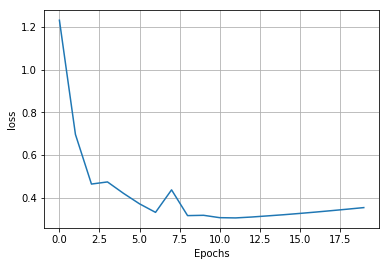

Model saved


In [54]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    loss_Acc=[]
    for i in range(EPOCHS):
        #X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #print(batch_x.shape, batch_y.shape)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy,loss_acc = evaluate(X_valid, y_valid)
       
        print("EPOCH {} ...".format(i+1))
        loss_Acc.append(loss_acc)
        print("Validation Loss = {:.3f}".format(loss_acc) , "Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    plt.plot(range(0,EPOCHS),loss_Acc)
    plt.ylabel('loss')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.show()
    saver.save(sess, './trafficTest')
    print("Model saved")

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
#with tf.Session() as sess:
sess = tf.get_default_session()
sess.run(tf.global_variables_initializer())
y_pred = LeNet(X_valid)
y_pred = tf.nn.softmax(y_pred)
correct_prediction = tf.argmax(y_pred, 1)
print(correct_prediction)

#classification_report()

AttributeError: 'NoneType' object has no attribute 'run'

In [76]:
y_prediction = tf.Variable(tf.zeros(480))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_pred = sess.run(logits, feed_dict={x: X_valid})
    y_pred = tf.nn.softmax(y_pred)
    correct_prediction = tf.argmax(y_pred, 1)
    y_prediction = sess.run(correct_prediction)
    #print(sess.run(correct_prediction))
    #correct_prediction = correct_prediction.reshape(correct_prediction, 1)
    #onehot_test = OneHotEncoder()
    #result = onehot_test.fit_transform(correct_prediction)
    #print(sess.run(result))



INFO:tensorflow:Restoring parameters from ./trafficTest


In [81]:
y_prediction =  y_prediction.reshape(y_prediction.shape[0] , 1)
y_prediction.shape

(480, 1)

In [86]:
onehot_test = OneHotEncoder(sparse=False)
result = onehot_test.fit_transform(y_prediction)

In [87]:
result

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [89]:
print(classification_report(y_valid, result))

             precision    recall  f1-score   support

          0       0.97      0.86      0.91        36
          1       0.84      0.95      0.89        43
          2       0.93      0.96      0.95        45
          3       0.95      0.87      0.91        45
          4       0.91      0.78      0.84        37
          5       0.95      0.95      0.95        41
          6       0.96      0.98      0.97        47
          7       0.87      0.96      0.92        28
          8       0.93      0.95      0.94        43
          9       0.98      1.00      0.99        43
         10       0.97      1.00      0.98        31
         11       0.88      0.85      0.86        41

avg / total       0.93      0.93      0.93       480

